#### **Import Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

#### **Getting the Data**

In [3]:
# url = "{kaggle url}"
# od.download(url)

data = pd.read_csv('train.csv')
data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
data.shape

(230130, 6)

In [ ]:
data['num_sold'].describe()

In [6]:
data['num_sold'].isnull().value_counts()

num_sold
False    221259
True       8871
Name: count, dtype: int64

In [7]:
data.dropna(subset=['num_sold'], inplace=True)

#### **Checking for duplicated rows**

In [8]:
data.duplicated().sum()

0

#### **Handling Missing Values**

In [9]:
print("\n--- Missing Values in All Columns ---")
print(data.isnull().sum()[data.isnull().sum() > 0])


--- Missing Values in All Columns ---
Series([], dtype: int64)


In [10]:
independent_features = data.drop(columns=['num_sold'])

print("Data Summary")
print("---------------")
def get_summary(col, df):
    dtype = str(df[col].dtype)
    unique_values = df[col].nunique()
    missing_values = round((df[col].isnull().sum()/df.shape[0])*100, 2)
    return f"{col:<12} | {dtype:<15} | {unique_values:<8} uniques | {missing_values:>5}% missing values"

for column in independent_features.columns:
    print(get_summary(column, independent_features))

Data Summary
---------------
id           | int64           | 221259   uniques |   0.0% missing values
date         | object          | 2557     uniques |   0.0% missing values
country      | object          | 6        uniques |   0.0% missing values
store        | object          | 3        uniques |   0.0% missing values
product      | object          | 5        uniques |   0.0% missing values


#### **Time Feature Engineering**

In [11]:
independent_features['date'] = pd.to_datetime(independent_features['date'])
independent_features['date'].dtype, independent_features['date'].head()

(dtype('<M8[ns]'),
 1   2010-01-01
 2   2010-01-01
 3   2010-01-01
 4   2010-01-01
 5   2010-01-01
 Name: date, dtype: datetime64[ns])

In [12]:
independent_features.head()

,id,date,country,store,product
1,1,2010-01-01,Canada,Discount Stickers,Kaggle
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers
3,3,2010-01-01,Canada,Discount Stickers,Kerneler
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose


In [13]:
independent_features = independent_features.assign(
    Year = independent_features['date'].dt.year,
    Month = independent_features['date'].dt.month,
    Day_Of_Week = independent_features['date'].dt.dayofweek, # 0=Monday
)

independent_features.sample(5)
    

,id,date,country,store,product,Year,Month,Day_Of_Week
50959,50959,2011-07-21,Finland,Discount Stickers,Kerneler Dark Mode,2011,7,3
68341,68341,2012-01-30,Italy,Discount Stickers,Kaggle,2012,1,0
107119,107119,2013-04-05,Finland,Discount Stickers,Kerneler Dark Mode,2013,4,4
106479,106479,2013-03-29,Canada,Stickers for Less,Kerneler Dark Mode,2013,3,4
27797,27797,2010-11-05,Singapore,Discount Stickers,Kaggle Tiers,2010,11,4


In [14]:
for column in independent_features.columns:
    print(get_summary(column, independent_features))

id           | int64           | 221259   uniques |   0.0% missing values
date         | datetime64[ns]  | 2557     uniques |   0.0% missing values
country      | object          | 6        uniques |   0.0% missing values
store        | object          | 3        uniques |   0.0% missing values
product      | object          | 5        uniques |   0.0% missing values
Year         | int32           | 7        uniques |   0.0% missing values
Month        | int32           | 12       uniques |   0.0% missing values
Day_Of_Week  | int32           | 7        uniques |   0.0% missing values


#### **Working with Categorical Data**

In [15]:
for col in ['country', 'store', 'product', 'Year', 'Month', 'Day_Of_Week']:
    print("----------------")
    print(independent_features[col].value_counts().to_frame())

----------------
           count
country         
Finland    38355
Italy      38355
Norway     38355
Singapore  38355
Canada     34109
Kenya      33730
----------------
                      count
store                      
Premium Sticker Mart  75684
Stickers for Less     74044
Discount Stickers     71531
----------------
                    count
product                  
Kaggle              46026
Kaggle Tiers        46026
Kerneler Dark Mode  46025
Kerneler            45962
Holographic Goose   37220
----------------
      count
Year       
2014  31823
2016  31767
2013  31721
2012  31719
2015  31643
2011  31445
2010  31141
----------------
       count
Month       
12     18994
1      18975
10     18876
3      18809
5      18634
8      18610
7      18545
11     18324
9      18149
4      18129
6      17958
2      17256
----------------
             count
Day_Of_Week       
6            31958
5            31853
4            31706
1            31444
3            31434
0            3143

#### **EDA - target variable**

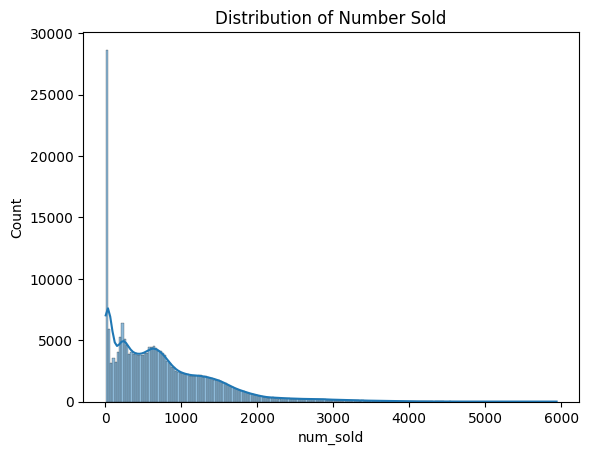

In [16]:
sns.histplot(data['num_sold'], kde=True)
plt.title('Distribution of Number Sold')
plt.show()

In [17]:
print(f"Skewness: {data['num_sold'].skew()}")

Skewness: 1.4153734524983919


Skewness: -1.1163769207373633


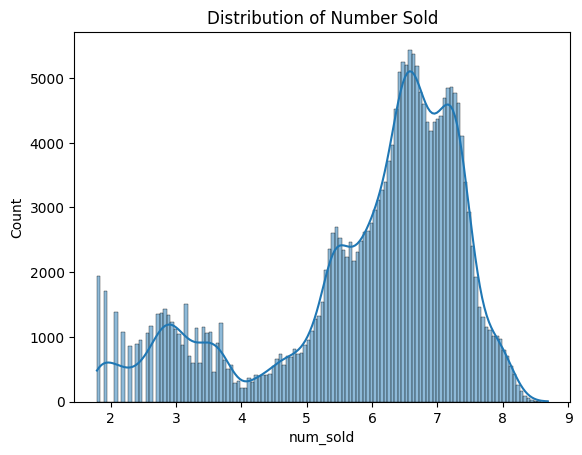

In [18]:
data['num_sold'] = np.log1p(data['num_sold'])
print(f"Skewness: {data['num_sold'].skew()}")
sns.histplot(data['num_sold'], kde=True)
plt.title('Distribution of Number Sold')
plt.show()

#### **EDA - independent features**

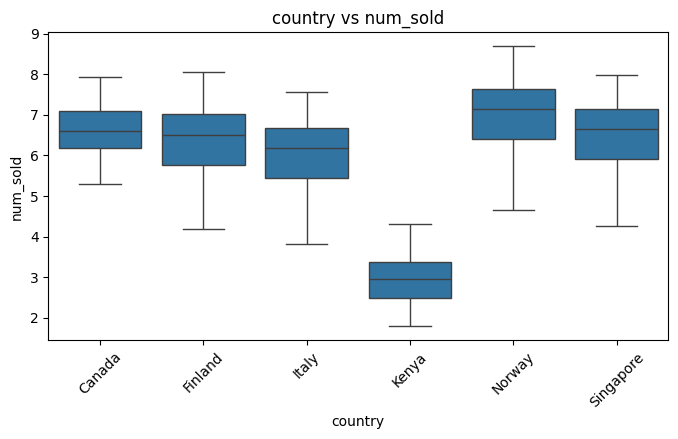

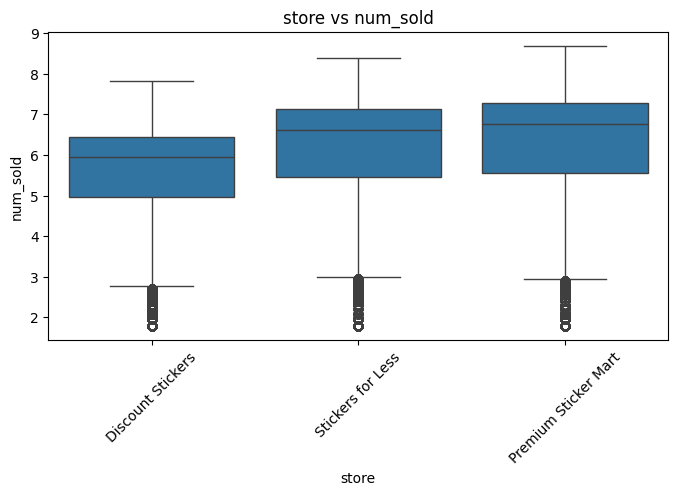

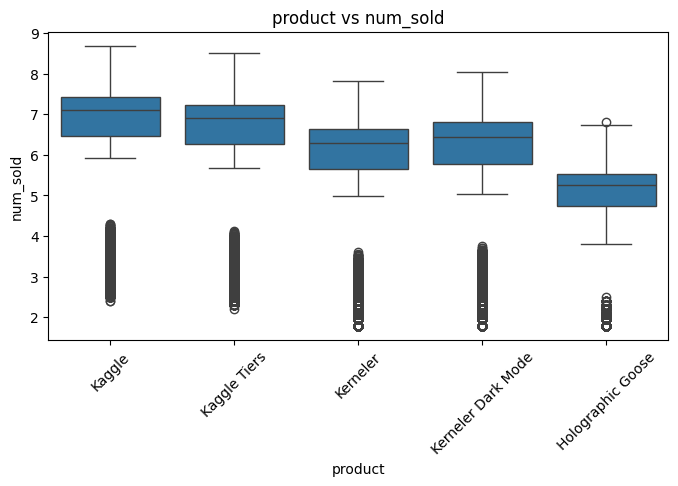

In [19]:
categoricals = ['country', 'store', 'product']
for col in categoricals:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=data, x=col, y='num_sold')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs num_sold')
    plt.show()


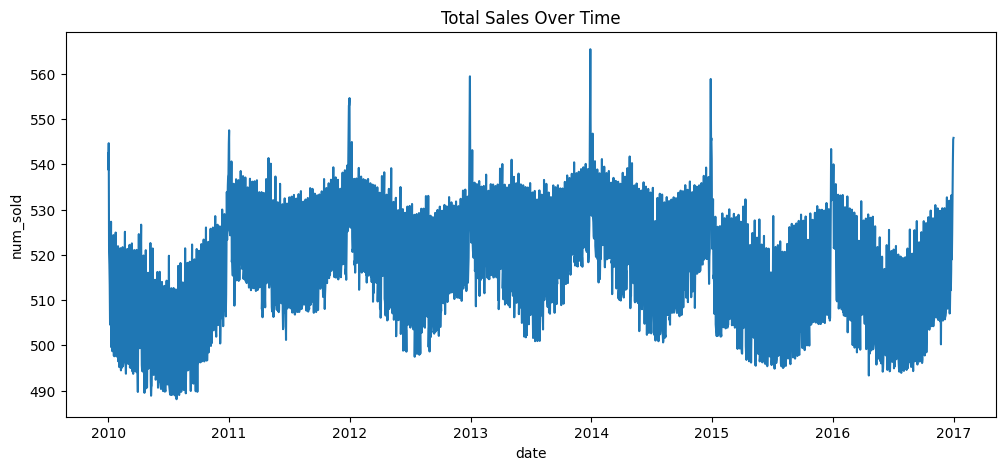

In [20]:
time_series = data.copy()
time_series['date'] = pd.to_datetime(time_series['date'])
time_series = time_series.groupby('date')['num_sold'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=time_series, x='date', y='num_sold')
plt.title('Total Sales Over Time')
plt.show()


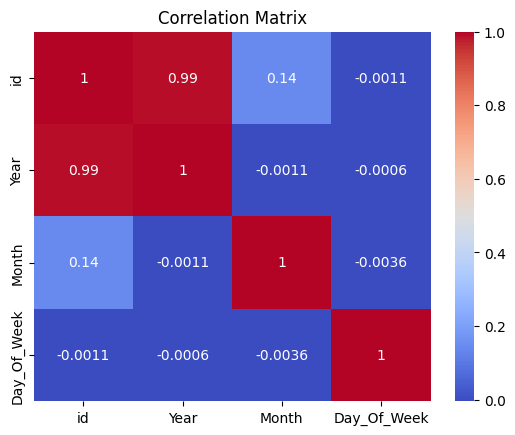

In [21]:
numeric_cols = independent_features.select_dtypes(include=np.number)
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### **Encoding the Categorical Values**

In [22]:
independent_features = independent_features.drop(columns=['id', 'date'])
df_encoded = pd.get_dummies(independent_features, columns=['country', 'store', 'product'], drop_first=True)
df_encoded.head()

,Year,Month,Day_Of_Week,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,2010,1,4,False,False,False,False,False,False,False,True,False,False,False
2,2010,1,4,False,False,False,False,False,False,False,False,True,False,False
3,2010,1,4,False,False,False,False,False,False,False,False,False,True,False
4,2010,1,4,False,False,False,False,False,False,False,False,False,False,True
5,2010,1,4,False,False,False,False,False,False,True,False,False,False,False


In [23]:
df_encoded.shape

(221259, 14)

#### **Train-Test Split**

In [24]:
from sklearn.model_selection import train_test_split

X = df_encoded
y = data['num_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **Model Training**

In [25]:
%%capture
! pip install xgboost
! pip install catboost

In [26]:
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [27]:
# Suppress CatBoost output
cat_model = CatBoostRegressor(verbose=0, random_state=42)
xgb_model = XGBRegressor(random_state=42, verbosity=0)

In [28]:
voting_model = VotingRegressor(estimators=[
    ('catboost', cat_model),
    ('xgboost', xgb_model)
])


In [29]:
param_grid = {
    'xgboost__n_estimators': [100, 200],
    'xgboost__learning_rate': [0.05, 0.1],
    'xgboost__max_depth': [3, 5],

    'catboost__iterations': [200],
    'catboost__learning_rate': [0.05, 0.1],
    'catboost__depth': [4, 6]
}

#### **Hyperparameter tuning**

In [30]:
grid_search = GridSearchCV(estimator=voting_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)


In [31]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


#### **Performance Evaluation**

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

print(f"RMSE: {np.sqrt(mse):.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


MAPE: 1.03%
RMSE: 0.0709
MAE: 0.0539
R² Score: 0.9978


In [33]:
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)


In [40]:
mse = mean_squared_error(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)
mape = np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)) * 100
print(f"MAPE: {mape:.2f}%")

print(f"RMSE: {np.sqrt(mse):.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


MAPE: 5.44%
RMSE: 74.4243
MAE: 40.6982
R² Score: 0.9884


#### **model evaluation diagnostics**

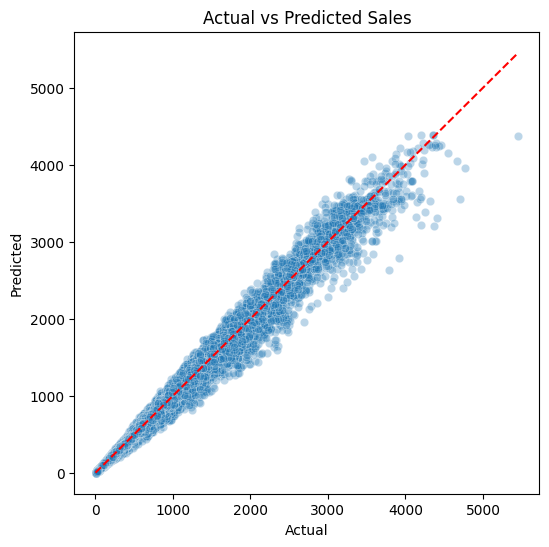

In [36]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')  # perfect line
plt.show()


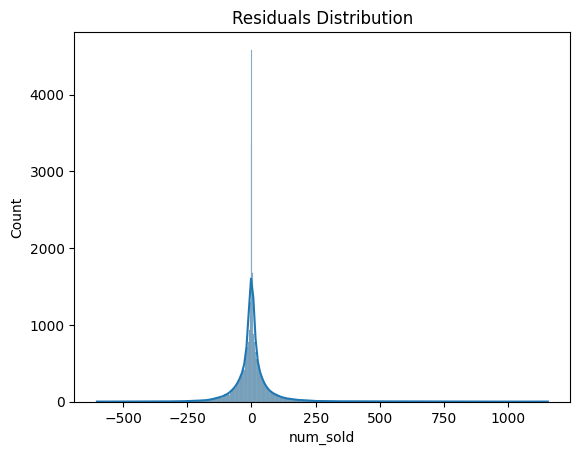

In [37]:
residuals = y_test_actual - y_pred_actual
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()
